# Exploratory Data Analysis in Ukraine 

### Roles to Explore:

In [106]:
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text



# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 

# Transform job_skills from str to list by using apply method
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [107]:
df_DA_UKR = df[(df['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])) & (df['job_country'] == 'Ukraine')].copy()

df_DA_UKR['job_title_short'].value_counts()

job_title_short
Data Analyst      473
Data Engineer     374
Data Scientist    232
Name: count, dtype: int64

In [108]:
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Ukraine', 'Anywhere')
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Odesa, Odessa Oblast, Ukraine', 'Odesa, Odesa Oblast, Ukraine')
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Ukraine  (+1 other)', 'Anywhere')
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Ukraine (+1 other)', 'Anywhere')
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Ukraine (+2 others)', 'Anywhere')
df_DA_UKR['job_location'] = df_DA_UKR['job_location'].replace('Ukrainka, Kyiv Oblast, Ukraine', 'Kyiv, Ukraine')


# Company name 
df_DA_UKR['company_name'] = df_DA_UKR['company_name'].replace('Перший Український Міжнародний Банк, АТ / ПУМБ', 'ПУМБ')


df_DA_UKR['job_location'].value_counts().to_frame()


,count
job_location,
"Kyiv, Ukraine",503
Anywhere,433
"Lviv, Lviv Oblast, Ukraine",51
"Odesa, Odesa Oblast, Ukraine",42
"Dnipro, Dnipropetrovsk Oblast, Ukraine",20
"Kharkiv, Kharkiv Oblast, Ukraine",10
"Vinnytsia, Vinnytsia Oblast, Ukraine",7
"Poltava, Poltava Oblast, Ukraine",4
"Chernivtsi, Chernivtsi Oblast, Ukraine",3


In [109]:
# Function to extract city name
def extract_city(location):
    if location == 'Anywhere':
        return location
    else:
        return location.split(',')[0]

# Apply the function to the `job_location` column and create a new column
df_DA_UKR['city'] = df_DA_UKR['job_location'].apply(extract_city)

df_DA_UKR.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,city
391918,Data Analyst,Technical Support Engineer | Analytics Pod,"Kyiv, Ukraine",via Вакансии Trabajo.org,Full-time,False,Ukraine,2023-05-26 18:27:08,True,False,Ukraine,None,NaN,NaN,Sisense,"[sql, javascript, nosql, mongodb, mongodb, she...","{'analyst_tools': ['power bi', 'ssrs', 'cognos...",Kyiv
230772,Data Engineer,Data Engineer,"Kyiv, Ukraine",via Вакансии Trabajo.org,Full-time,False,Ukraine,2023-01-18 07:37:45,True,False,Ukraine,None,NaN,NaN,Genesis,"[python, sql, bigquery, airflow, hadoop, spark...","{'cloud': ['bigquery'], 'libraries': ['airflow...",Kyiv
140185,Data Scientist,Data Scientist,"Lviv, Lviv Oblast, Ukraine",via Ai-Jobs.net,Full-time,False,Ukraine,2023-06-28 09:04:05,False,False,Ukraine,year,132500.0,NaN,Gameloft,"[python, sql, matplotlib, seaborn, tableau, po...","{'analyst_tools': ['tableau', 'power bi'], 'li...",Lviv
484085,Data Engineer,Middle Data Engineer (Communication Management...,"Kyiv, Ukraine",via Rabota.ua,Full-time,False,Ukraine,2023-05-19 14:06:24,True,False,Ukraine,None,NaN,NaN,Sigma Software,None,None,Kyiv
695455,Data Analyst,Data Analyst: Training and Project Work (remot...,Anywhere,via LinkedIn,Part-time,True,Ukraine,2023-10-01 10:26:47,True,False,Ukraine,None,NaN,NaN,Moyyn,[python],{'programming': ['python']},Anywhere
177773,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,Ukraine,2023-03-02 15:32:28,False,False,Ukraine,None,NaN,NaN,JustAnswer,"[python, sql]","{'programming': ['python', 'sql']}",Anywhere
181513,Data Analyst,Data Analyst,"Kyiv, Ukraine",via Rabota.ua,Full-time,False,Ukraine,2023-05-17 15:52:36,True,False,Ukraine,None,NaN,NaN,Софтіко,None,None,Kyiv
218400,Data Analyst,Data Analyst,"Kyiv, Ukraine",via RABOTA.ua,Full-time,False,Ukraine,2023-02-01 23:49:27,True,False,Ukraine,None,NaN,NaN,Kyivstar / Киевстар,None,None,Kyiv
6460,Data Engineer,Integration/Data Engineer for Azure Platform I...,"Kyiv, Ukraine",via LinkedIn,Full-time,False,Ukraine,2023-04-11 14:14:43,True,False,Ukraine,None,NaN,NaN,GlobalLogic,"[c#, sql, nosql, azure]","{'cloud': ['azure'], 'programming': ['c#', 'sq...",Kyiv
438368,Data Engineer,Data Engineer,"Kyiv, Ukraine",via LinkedIn,Full-time,False,Ukraine,2023-09-05 16:24:14,True,False,Ukraine,None,NaN,NaN,Uklon,"[sql, python, java, scala, postgresql, snowfla...","{'cloud': ['snowflake', 'aws', 'bigquery', 're...",Kyiv


In [110]:
# Removed the 'job_location' column & renamed the 'city' column to 'job_location'
df_DA_UKR.drop('job_location', axis=1, inplace=True)
df_DA_UKR.rename(columns={'city': 'job_location'}, inplace=True)

df_DA_UKR


,job_title_short,job_title,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_location
275,Data Engineer,Інженер з договірної роботи,via RABOTA.ua,Full-time,False,Ukraine,2023-01-24 13:51:43,True,False,Ukraine,None,NaN,NaN,Vodafone Україна,None,None,Dnipro
524,Data Analyst,Data analyst,via Robota.ua,Full-time,False,Ukraine,2023-07-11 13:47:33,True,False,Ukraine,None,NaN,NaN,"Fozzy Group, Логістика",None,None,Kyiv
655,Data Engineer,Middle Data Engineer (Communication Management...,via Rabota.ua,Full-time,False,Ukraine,2023-06-02 13:43:32,True,False,Ukraine,None,NaN,NaN,Sigma Software,None,None,Chernivtsi
855,Data Scientist,Data Scientist (Machine Learning),via Robota.ua,Full-time,False,Ukraine,2023-09-15 13:47:48,False,False,Ukraine,None,NaN,NaN,"ФОРА, ООО",None,None,Kyiv
1484,Data Scientist,Middle Data Scientist/Engineer,via Jooble,Full-time,False,Ukraine,2023-12-19 13:50:16,False,False,Ukraine,None,NaN,NaN,Data Science UA,"[sql, nosql, numpy, pandas, scikit-learn, flask]","{'libraries': ['numpy', 'pandas', 'scikit-lear...",Kyiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774775,Data Engineer,Azure Data Lifecycle Engineer (Developer),via Startup Jobs,Full-time,False,Ukraine,2023-03-04 01:26:34,True,False,Ukraine,None,NaN,NaN,Kyivstar,"[sql, r, nosql, java, scala, python, azure, da...","{'cloud': ['azure', 'databricks'], 'libraries'...",Kyiv
775837,Data Scientist,Data Scientist | Zeki,via Jooble,Full-time,True,Ukraine,2023-02-06 02:04:05,False,False,Ukraine,None,NaN,NaN,GT,"[python, sql, go, aws, pandas]","{'cloud': ['aws'], 'libraries': ['pandas'], 'p...",Anywhere
775915,Data Analyst,Data Analyst,via Startup Jobs,Full-time,False,Ukraine,2023-03-04 01:26:30,True,False,Ukraine,None,NaN,NaN,Kyivstar,"[html, javascript, sql, firebase, firebase, bi...","{'analyst_tools': ['power bi'], 'cloud': ['fir...",Kyiv
781080,Data Analyst,Team Lead Supply Chain Data Analyst,via LinkedIn,Full-time,False,Ukraine,2023-09-25 06:17:44,False,False,Ukraine,None,NaN,NaN,AUTODOC,"[sql, python, excel]","{'analyst_tools': ['excel'], 'programming': ['...",Odesa


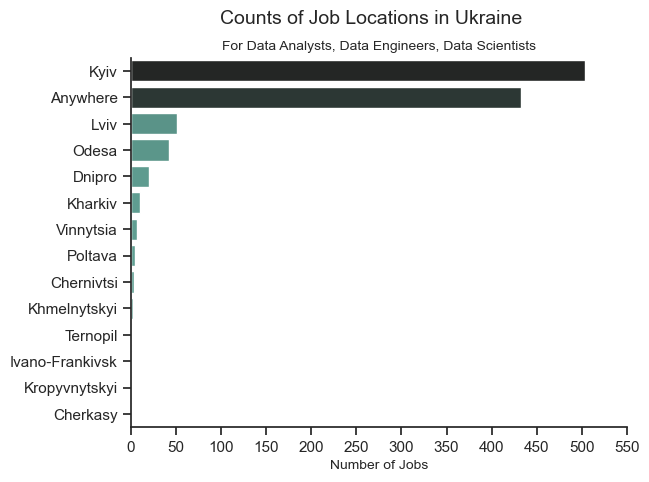

In [111]:
df_DA_plot = df_DA_UKR['job_location'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_DA_plot, x='count', y='job_location', hue='count', palette='dark:#5A9_r', legend= False)
sns.despine()
plt.suptitle('Counts of Job Locations in Ukraine', fontsize=14)
plt.title('For Data Analysts, Data Engineers, Data Scientists', fontsize=10)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('')
plt.xticks(range(0, 600, 50))
plt.show()

In [112]:
# Create a list of values to filter out
values_to_remove = ['Internship', 'Full-time and Internship', 'Full-time and Part-time', 'Temp work']

# Filter the DataFrame using the `isin()` method
rows_to_drop = df_DA_UKR[df_DA_UKR['job_schedule_type'].isin(values_to_remove)].index

# Drop the rows
df_DA_UKR.drop(rows_to_drop, inplace=True)

df_DA_UKR['job_schedule_type'].value_counts()


job_schedule_type
Full-time     1029
Contractor      24
Part-time       15
Name: count, dtype: int64

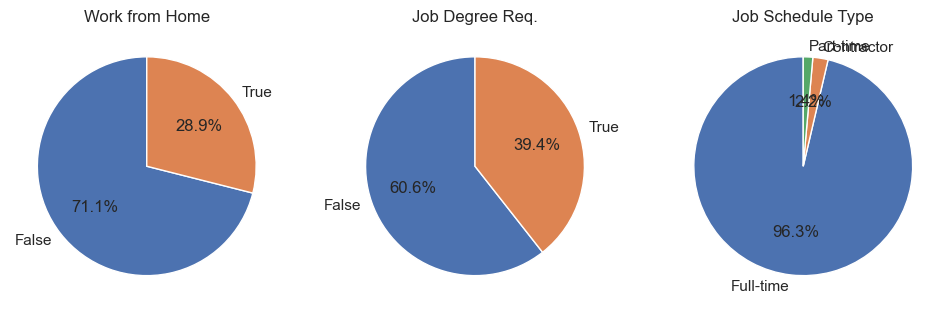

In [113]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_schedule_type': 'Job Schedule Type'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    if i == 2:  # Check if it's the last pie chart
        data = df_DA_UKR[column].value_counts().values
        labels = df_DA_UKR[column].value_counts().index.to_numpy()
    else:
        # Data and labels for the first two pie charts remain the same
        data = df_DA_UKR[column].value_counts()
        labels = ['False', 'True']

    ax[i].pie(data, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.show()

In [115]:
df_DA_companies = df_DA_UKR['company_name'].value_counts().head(30).to_frame()

df_DA_companies

,count
company_name,
AUTODOC,47
Genesis,29
EPAM Systems,23
GlobalLogic,22
N-iX,21
Lyft,16
Sigma Software,15
Intellias,14
Ciklum,13


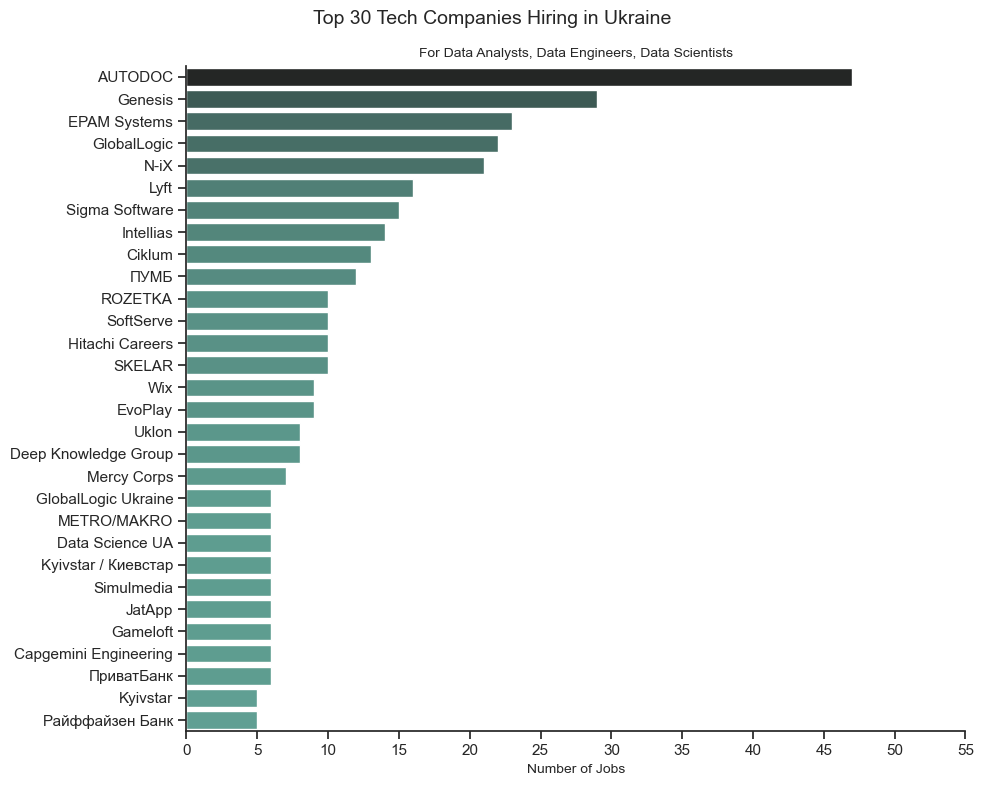

In [116]:
df_DA_companies = df_DA_UKR['company_name'].value_counts().to_frame().head(30)

plt.figure(figsize=(10, 8))
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_companies, x='count', y='company_name', hue='count', palette='dark:#5A9_r', legend= False)
sns.despine()
plt.suptitle('Top 30 Tech Companies Hiring in Ukraine', fontsize=14)
plt.title('For Data Analysts, Data Engineers, Data Scientists', fontsize=10)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('')
plt.xticks(range(0, 60, 5))
plt.tight_layout()
plt.show()

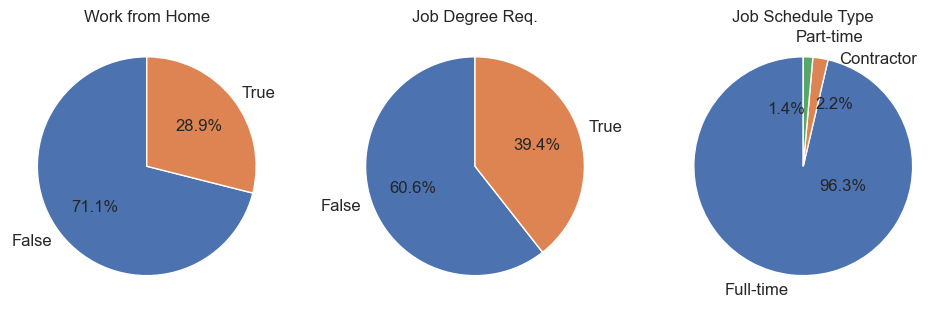

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
    'job_schedule_type': 'Job Schedule Type'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    if i == 2:  # Check if it's the last pie chart
        data = df_DA_UKR[column].value_counts().values
        labels = df_DA_UKR[column].value_counts().index.to_numpy()
        #explode = [0, 0.1, 0.1]  # Explode the "Part-time" and "Contractor" slices
    else:
        # Data and labels for the first two pie charts remain the same
        data = df_DA_UKR[column].value_counts()
        labels = ['False', 'True']
        explode = None

    ax[i].pie(data, startangle=90, autopct='%1.1f%%', labels=labels, explode=explode,
             textprops={'fontsize': 12})  # Adjust font size if needed
    ax[i].set_title(title)

    # Adjust text for the third pie chart
    if i == 2:
        texts = ax[i].texts
        # Adjust the position of the "1.4%" label
        texts[1].set_position((0.5, -0.1))  # Adjust x and y coordinates as needed
        # Remove arrowprops and force text adjustment
        adjust_text(texts, force_points=0.2, force_text=0.6, arrowprops=None)

plt.show()